Katie Briggs
Project 2
Diagnosis of Inflammation in Urinary System

In [1]:
# import libraries

import pandas as pd
import numpy as np
import csv
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score,confusion_matrix

In [3]:
# read in data that has been combined to one data set

data1=pd.read_csv('diagnosis.csv',header=0)

# confirm that data is readable
data1.head(10)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
5,36.0,no,yes,no,no,no,no,no
6,36.2,no,no,yes,yes,yes,yes,no
7,36.2,no,yes,no,no,no,no,no
8,36.3,no,no,yes,yes,yes,yes,no
9,36.6,no,no,yes,yes,yes,yes,no


In [4]:
# create columns 

data1.columns=['Temp','nausea','Lumbarpain','urination','Micturitionpains','urethrasymptoms','Inflammation','Nephritis']

In [5]:
# confirm columns

data1.head(5)

,Temp,nausea,Lumbarpain,urination,Micturitionpains,urethrasymptoms,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [6]:
# check variables

data1.dtypes

Temp                float64
nausea               object
Lumbarpain           object
urination            object
Micturitionpains     object
urethrasymptoms      object
Inflammation         object
Nephritis            object
dtype: object

In [7]:
# confirm that null values were removed

for i in data1.columns:
    print(data1[i].isna().sum())

0
0
0
0
0
0
0
0


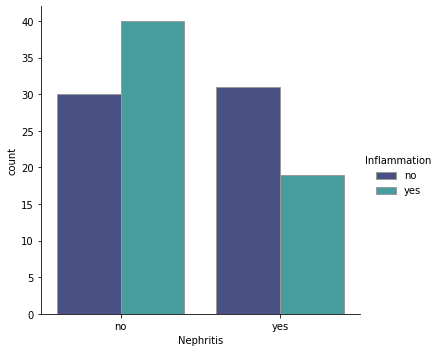

In [8]:
# Plot variables (symptoms) to confirm relationships between Inflammation and Nephritis. 

sns.catplot(x="Nephritis", hue="Inflammation", kind="count",palette="mako", edgecolor=".6",data=data1);

Inflammation is a symptom of Nephritis. Patients without Inflammation may have Acute Nephritis even though Inflammation in acute nephritis. It is quite difficult to diffrentiate acute nephritis from inflammation. So, let us continue our symptom plots. 

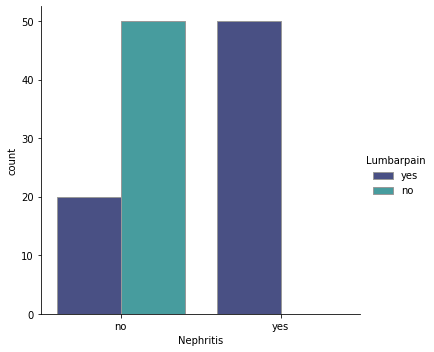

In [9]:
# Plot symptoms to confirm relationships between Lumbarpain and Nephritis. 

sns.catplot(x="Nephritis", hue="Lumbarpain", kind="count",palette="mako", edgecolor=".6",data=data1);

It looks as though Lumbarpain is almost always a symptom of Nephritis. However, it is also seen in other urinary system issues.

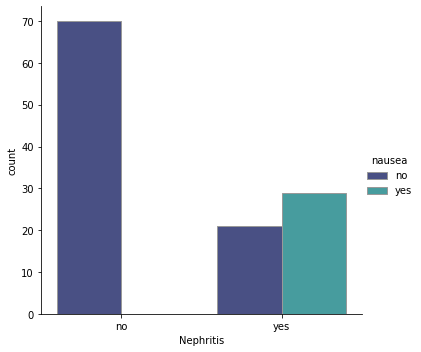

In [10]:
# Plot symptoms to confirm relationships between Nausea and Nephritis.

sns.catplot(x="Nephritis", hue="nausea", kind="count",palette="mako", edgecolor=".6",data=data1);

Nausea is seen in Nephritis.  It is not seen in any patients without Nephritis. 

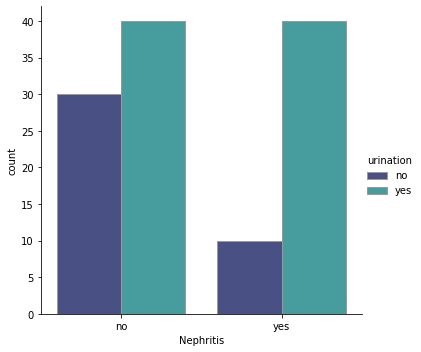

In [11]:
# Plot symptoms to confirm replationships between frequent urination and Nephritis. 

sns.catplot(x="Nephritis", hue="urination", kind="count",palette="mako", edgecolor=".6",data=data1);

Frequent Urination is seen in both Nephritis and other urinary systems.

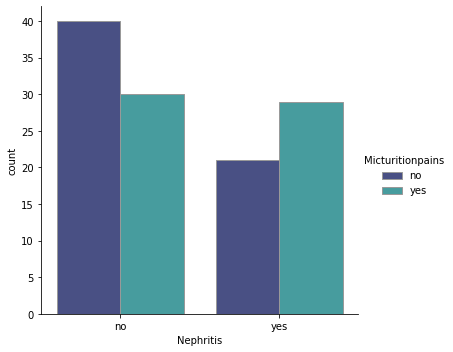

In [12]:
# Plot symptoms to confirm replationships between micturition pains and Nephritis.

sns.catplot(x="Nephritis", hue="Micturitionpains", kind="count",palette="mako", edgecolor=".6",data=data1);

This is also seen in both Nephritis and other urinary system issues.

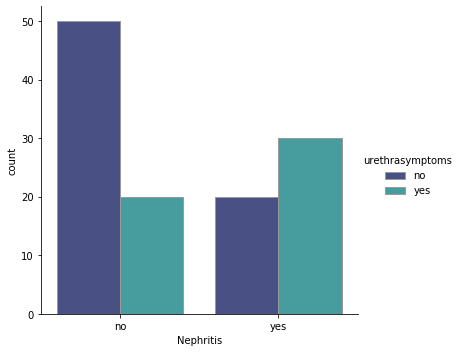

In [13]:
# Plot symptoms to confirm replationships between urethra burning and Nephritis.

sns.catplot(x="Nephritis", hue="urethrasymptoms", kind="count",palette="mako", edgecolor=".6",data=data1);

This is also seen in both Nephritis and other urinary system issues.

Now let's look at the relationships between inflammation of system and the symptoms.

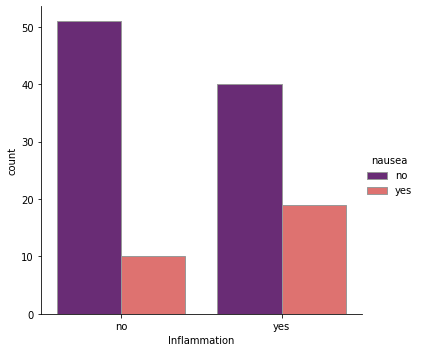

In [14]:
# Plot symptoms to confirm replationships nausea and Inflammation.

sns.catplot(x="Inflammation", hue="nausea", kind="count",palette="magma", edgecolor=".6",data=data1);

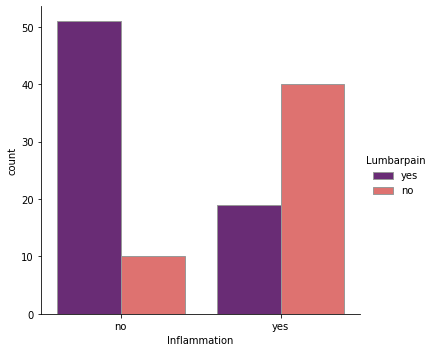

In [15]:
# Plot symptoms to confirm replationships lumbar pain and Inflammation.

sns.catplot(x="Inflammation", hue="Lumbarpain", kind="count",palette="magma", edgecolor=".6",data=data1);

Lumbar pain count for inflammation and nephritis has been showing same count. This shows that a lot of patients may be having both diseases.

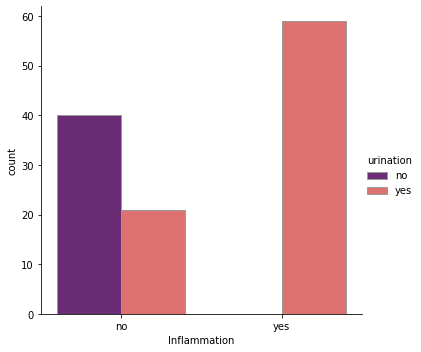

In [16]:
# Plot symptoms to confirm replationships frequent urination and Inflammation.

sns.catplot(x="Inflammation", hue="urination", kind="count",palette="magma", edgecolor=".6",data=data1);

Frequent urination is seen in Inflammtion and not seen as much in patients with Nephritis. 

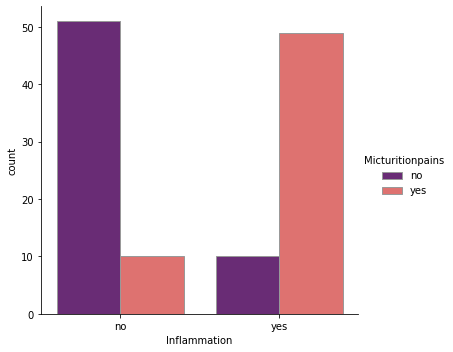

In [17]:
# Plot symptoms to confirm replationships micturition pains and Inflammation.

sns.catplot(x="Inflammation", hue="Micturitionpains", kind="count",palette="magma", edgecolor=".6",data=data1);

Micturition pains are seen highly in inflammation of the bladder.  

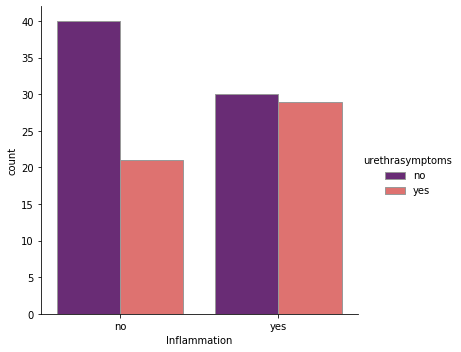

In [18]:
# Plot symptoms to confirm replationships urethra pains and Inflammation.

sns.catplot(x="Inflammation", hue="urethrasymptoms", kind="count",palette="magma", edgecolor=".6",data=data1);

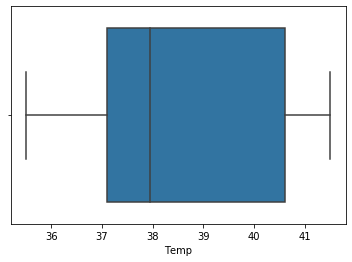

In [19]:
# Check if temp has outliers Temp is in Cel.

sns.boxplot(data1['Temp'])

# Tempature associated with Inflammation only.

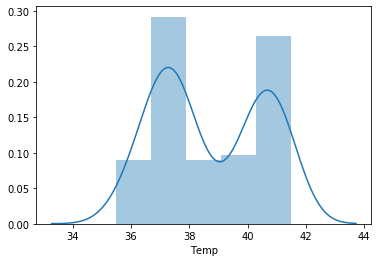

In [20]:
sns.distplot(data1['Temp'])

In [21]:
mask=data1.Inflammation=="yes"

In [23]:
data_new=data1[mask]

mask1=data_new.Nephritis=="no"

In [24]:
data_new1=data_new[mask1]

data_new1.head()

,Temp,nausea,Lumbarpain,urination,Micturitionpains,urethrasymptoms,Inflammation,Nephritis
1,35.9,no,no,yes,yes,yes,yes,no
3,36.0,no,no,yes,yes,yes,yes,no
6,36.2,no,no,yes,yes,yes,yes,no
8,36.3,no,no,yes,yes,yes,yes,no
9,36.6,no,no,yes,yes,yes,yes,no


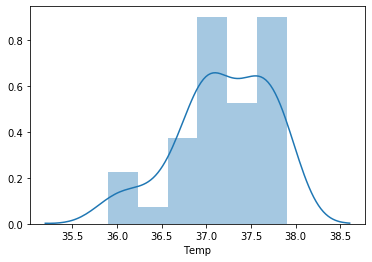

In [25]:
# Plot temp with inflammtion
sns.distplot(data_new1['Temp'])

The plot shows the temperature range of the people who have Inflammation, but not Nephritis . It can be seen the body temperature does vary between 36-38 degrees Cel.

# Tempature associated with Inflammation and Nephritis.

In [26]:
mask2=data_new.Nephritis=="yes"

In [27]:
data_new2=data_new[mask2]

data_new2.head()


,Temp,nausea,Lumbarpain,urination,Micturitionpains,urethrasymptoms,Inflammation,Nephritis
70,40.0,yes,yes,yes,yes,yes,yes,yes
71,40.0,yes,yes,yes,yes,yes,yes,yes
72,40.0,yes,yes,yes,yes,no,yes,yes
78,40.1,yes,yes,yes,yes,no,yes,yes
79,40.2,yes,yes,yes,yes,yes,yes,yes


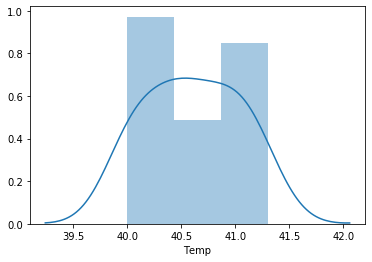

In [28]:
# Plot temp with Inflammation and Nephritis
sns.distplot(data_new2['Temp'])

 It shows that the patients with inflammation and acute nephritis have a body temp range between 40-41.5.  Which is higher than Inflammation alone. 

# Tempature associated with Nephritis only.

In [29]:
mask4=data1.Inflammation=="no"

data_new4=data1[mask4]

mask5=data_new4.Nephritis=="yes"

data_new5=data_new4[mask5]

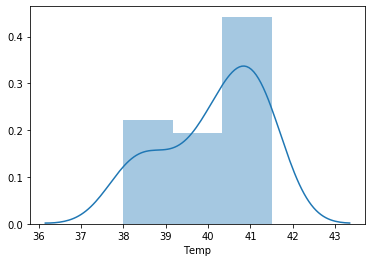

In [30]:
# Plot Temp with Nephritis.

sns.distplot(data_new5['Temp'])

Patients with Nephritis have a body temp range of 38 to 41.5 degrees cel. 

# Create model of Nephritis

In [31]:
target=data1['Nephritis']
predictors=data1.drop('Nephritis',axis=1)

In [32]:
lc=LabelEncoder()
sc=StandardScaler()
predictors['nausea']=lc.fit_transform(predictors['nausea'])
predictors['Lumbarpain']=lc.fit_transform(predictors['Lumbarpain'])
predictors['urination']=lc.fit_transform(predictors['urination'])
predictors['Micturitionpains']=lc.fit_transform(predictors['Micturitionpains'])
predictors['urethrasymptoms']=lc.fit_transform(predictors['urethrasymptoms'])
predictors['Inflammation']=lc.fit_transform(predictors['Inflammation'])
predictors=sc.fit_transform(predictors)
target=lc.fit_transform(target)

In [33]:
dcr=DecisionTreeClassifier()
gb=GradientBoostingClassifier()

In [34]:
# Train test and split

X_train,X_test,Y_train,Y_test=train_test_split(predictors,target,test_size=0.25)

In [35]:
# Train results 

print(X_train)

[[-0.73096312 -0.56451866  0.84515425 -1.41421356 -0.98346994 -0.84515425
  -0.98346994]
 [-0.56535788 -0.56451866 -1.18321596  0.70710678  1.0168079  -0.84515425
   1.0168079 ]
 [ 0.81468577  1.77142063  0.84515425  0.70710678  1.0168079   1.18321596
   1.0168079 ]
 [ 0.15226482 -0.56451866  0.84515425  0.70710678 -0.98346994  1.18321596
  -0.98346994]
 [ 1.25629973  1.77142063  0.84515425 -1.41421356  1.0168079  -0.84515425
  -0.98346994]
 [-0.89656836 -0.56451866  0.84515425 -1.41421356 -0.98346994 -0.84515425
  -0.98346994]
 [-0.9517701  -0.56451866 -1.18321596  0.70710678  1.0168079   1.18321596
   1.0168079 ]
 [ 0.70428227  1.77142063  0.84515425  0.70710678  1.0168079  -0.84515425
   1.0168079 ]
 [-1.50378756 -0.56451866  0.84515425 -1.41421356 -0.98346994 -0.84515425
  -0.98346994]
 [-0.45495439 -0.56451866 -1.18321596  0.70710678  1.0168079  -0.84515425
   1.0168079 ]
 [-0.84136661 -0.56451866 -1.18321596  0.70710678 -0.98346994 -0.84515425
   1.0168079 ]
 [-0.9517701  -0.5645

In [36]:
# Test Results

print(X_test)

[[ 1.53230846 -0.56451866  0.84515425  0.70710678 -0.98346994  1.18321596
  -0.98346994]
 [ 0.92508926  1.77142063  0.84515425 -1.41421356  1.0168079  -0.84515425
  -0.98346994]
 [-0.12374391 -0.56451866  0.84515425  0.70710678 -0.98346994  1.18321596
  -0.98346994]
 [-1.17257708 -0.56451866  0.84515425 -1.41421356 -0.98346994 -0.84515425
  -0.98346994]
 [-1.17257708 -0.56451866 -1.18321596  0.70710678  1.0168079   1.18321596
   1.0168079 ]
 [-0.67576137 -0.56451866 -1.18321596  0.70710678  1.0168079   1.18321596
   1.0168079 ]
 [-0.56535788 -0.56451866 -1.18321596  0.70710678 -0.98346994 -0.84515425
   1.0168079 ]
 [-0.23414741 -0.56451866  0.84515425  0.70710678 -0.98346994  1.18321596
  -0.98346994]
 [ 0.3730718  -0.56451866  0.84515425  0.70710678 -0.98346994  1.18321596
  -0.98346994]
 [ 1.36670322 -0.56451866 -1.18321596 -1.41421356 -0.98346994 -0.84515425
  -0.98346994]
 [-1.50378756 -0.56451866 -1.18321596  0.70710678  1.0168079   1.18321596
   1.0168079 ]
 [ 0.92508926 -0.5645

In [37]:
def modelselection_tree(model,parameters):
    model_tree=GridSearchCV(model,parameters,cv=5,verbose=1,n_jobs=1)
    model_tree.fit(X_train,Y_train)
    y_pred = model_tree.predict(X_test)
    print("Best parameters:")
    print(model_tree.best_params_)

In [38]:
def modelselection_gbm(model,parameters):
    model_gbm=GridSearchCV(model,parameters,cv=5,verbose=1,n_jobs=1)
    model_gbm.fit(X_train,Y_train)
    y_pred = model_gbm.predict(X_test)
    print("Best parameters:")
    print(model_gbm.best_params_)

In [39]:
# Cross Validation parameters

scoring = ['accuracy', 'precision']
parameter_for_gradient_boost={'loss':['deviance','exponential'],'learning_rate':[0.1,0.15,0.2,0.4],'max_features':['auto','sqrt'],'criterion':['friedman_mse','mse']}
parameter_for_tree={'max_features':['auto','sqrt','log2'],'criterion':['gini','entropy']}
print("Result for Decision Tree CLassifier")
dcr_model=modelselection_tree(dcr,parameter_for_tree)
print("Result for GradientBoosting Classifier")
gb_model=modelselection_gbm(gb,parameter_for_gradient_boost)

Result for Decision Tree CLassifier
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:
{'criterion': 'gini', 'max_features': 'sqrt'}
Result for GradientBoosting Classifier
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_features': 'auto'}


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    3.6s finished


In [40]:
# Boost with recommended parameter

gb_model=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='deviance',max_features='sqrt')
gb_model.fit(X_train,Y_train)
y_pred_gb=gb_model.predict(X_test)

In [41]:
# Check accuracy

print(accuracy_score(Y_test,y_pred_gb))

1.0


In [42]:
# Confusion Matrix

print(confusion_matrix(Y_test,y_pred_gb))

[[16  0]
 [ 0 14]]


In [43]:
# Decision Classifier

dc_model=DecisionTreeClassifier(max_features='sqrt',criterion='gini')

In [44]:
y_pred_dc=dc_model.predict(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [45]:
# fit model before predicting

dc_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_pred_dc=dc_model.predict(X_test)

In [251]:
print(y_pred_dc)

[1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1]


In [47]:
# Check accuracy

print(accuracy_score(Y_test,y_pred_dc))

1.0


In [48]:
# Confusion Matrix

print(confusion_matrix(Y_test,y_pred_dc))

[[16  0]
 [ 0 14]]


In [164]:
# Import libraries for Decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
#import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization


from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

In [186]:
col_names = ['Temp', 'nausea', 'Lumbarpain', 'urination', 'Micturitionpains', 'urethrasymptoms', 'Inflammation', 'Nephritis']
df1 = pd.read_csv("diagnosis.csv", header=None, names=col_names, skiprows=1)
df1.head(2)

,Temp,nausea,Lumbarpain,urination,Micturitionpains,urethrasymptoms,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no


In [187]:
df1.info

<bound method DataFrame.info of      Temp nausea Lumbarpain urination Micturitionpains urethrasymptoms  \
0    35.5     no        yes        no               no              no   
1    35.9     no         no       yes              yes             yes   
2    35.9     no        yes        no               no              no   
3    36.0     no         no       yes              yes             yes   
4    36.0     no        yes        no               no              no   
..    ...    ...        ...       ...              ...             ...   
115  41.4     no        yes       yes               no             yes   
116  41.5     no         no        no               no              no   
117  41.5    yes        yes        no              yes              no   
118  41.5     no        yes       yes               no             yes   
119  41.5     no        yes       yes               no             yes   

    Inflammation Nephritis  
0             no        no  
1            yes     

In [189]:
for i in df1.nausea.values:
    if i  == 'no':
        df1.nausea.replace(i, 0, inplace = True)
    elif i == 'yes':
        df1.nausea.replace(i, 1, inplace = True)

for i in df1.Lumbarpain.values:
    if i == 'no':
        df1.Lumbarpain.replace(i, 0, inplace = True)
    elif i == 'yes':
        df1.Lumbarpain.replace(i, 1, inplace = True)

for i in df1.urination.values:
    if i == 'no':
        df1.urination.replace(i, 0, inplace = True)
    elif i == 'yes':
        df1.urination.replace(i, 1, inplace = True)
        
for i in df1.Micturitionpains.values:
    if i == 'no':
        df1.Micturitionpains.replace(i, 0, inplace = True)
    elif i == 'yes':
        df1.Micturitionpains.replace(i, 1, inplace = True)
        
for i in df1.urethrasymptoms.values:
    if i == 'no':
        df1.urethrasymptoms.replace(i, 0, inplace = True)
    elif i == 'yes':
        df1.urethrasymptoms.replace(i, 1, inplace = True)

for i in df1.Inflammation.values:
    if i == 'no':
        df1.Inflammation.replace(i, 0, inplace = True)
    elif i == 'yes':
        df1.Inflammation.replace(i, 1, inplace = True)
        
for i in df1.Nephritis .values:
    if i == 'no':
        df1.Nephritis.replace(i, 0, inplace = True)
    elif i == 'yes':
        df1.Nephritis.replace(i, 1, inplace = True)       
        
print(cl(df1, attrs = ['bold']))

# confirm that yes turned to 1 and no to 0
df1.head(10)

     Temp  nausea  Lumbarpain  urination  Micturitionpains  urethrasymptoms  \
0    35.5       0           1          0                 0                0   
1    35.9       0           0          1                 1                1   
2    35.9       0           1          0                 0                0   
3    36.0       0           0          1                 1                1   
4    36.0       0           1          0                 0                0   
..    ...     ...         ...        ...               ...              ...   
115  41.4       0           1          1                 0                1   
116  41.5       0           0          0                 0                0   
117  41.5       1           1          0                 1                0   
118  41.5       0           1          1                 0                1   
119  41.5       0           1          1                 0                1   

     Inflammation  Nephritis  
0               0   

,Temp,nausea,Lumbarpain,urination,Micturitionpains,urethrasymptoms,Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
5,36.0,0,1,0,0,0,0,0
6,36.2,0,0,1,1,1,1,0
7,36.2,0,1,0,0,0,0,0
8,36.3,0,0,1,1,1,1,0
9,36.6,0,0,1,1,1,1,0


In [195]:
X_var = df1[['nausea','Lumbarpain', 'urination', 'Micturitionpains', 'urethrasymptoms', 'Inflammation']].values # independent variable
y_var = df1['Nephritis'].values # dependent variable

print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[0 1 0 0 0 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 0]]
Y variable samples : [0 0 0 0 0]


In [197]:
# Train and test
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'blue'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'blue'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'blue'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'blue'))

X_train shape : (96, 6)
X_test shape : (24, 6)
y_train shape : (96,)
y_test shape : (24,)


In [252]:
# fit model

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
import numpy as np
import numpy

model = dtc(criterion = 'entropy', max_depth = 10)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 100%


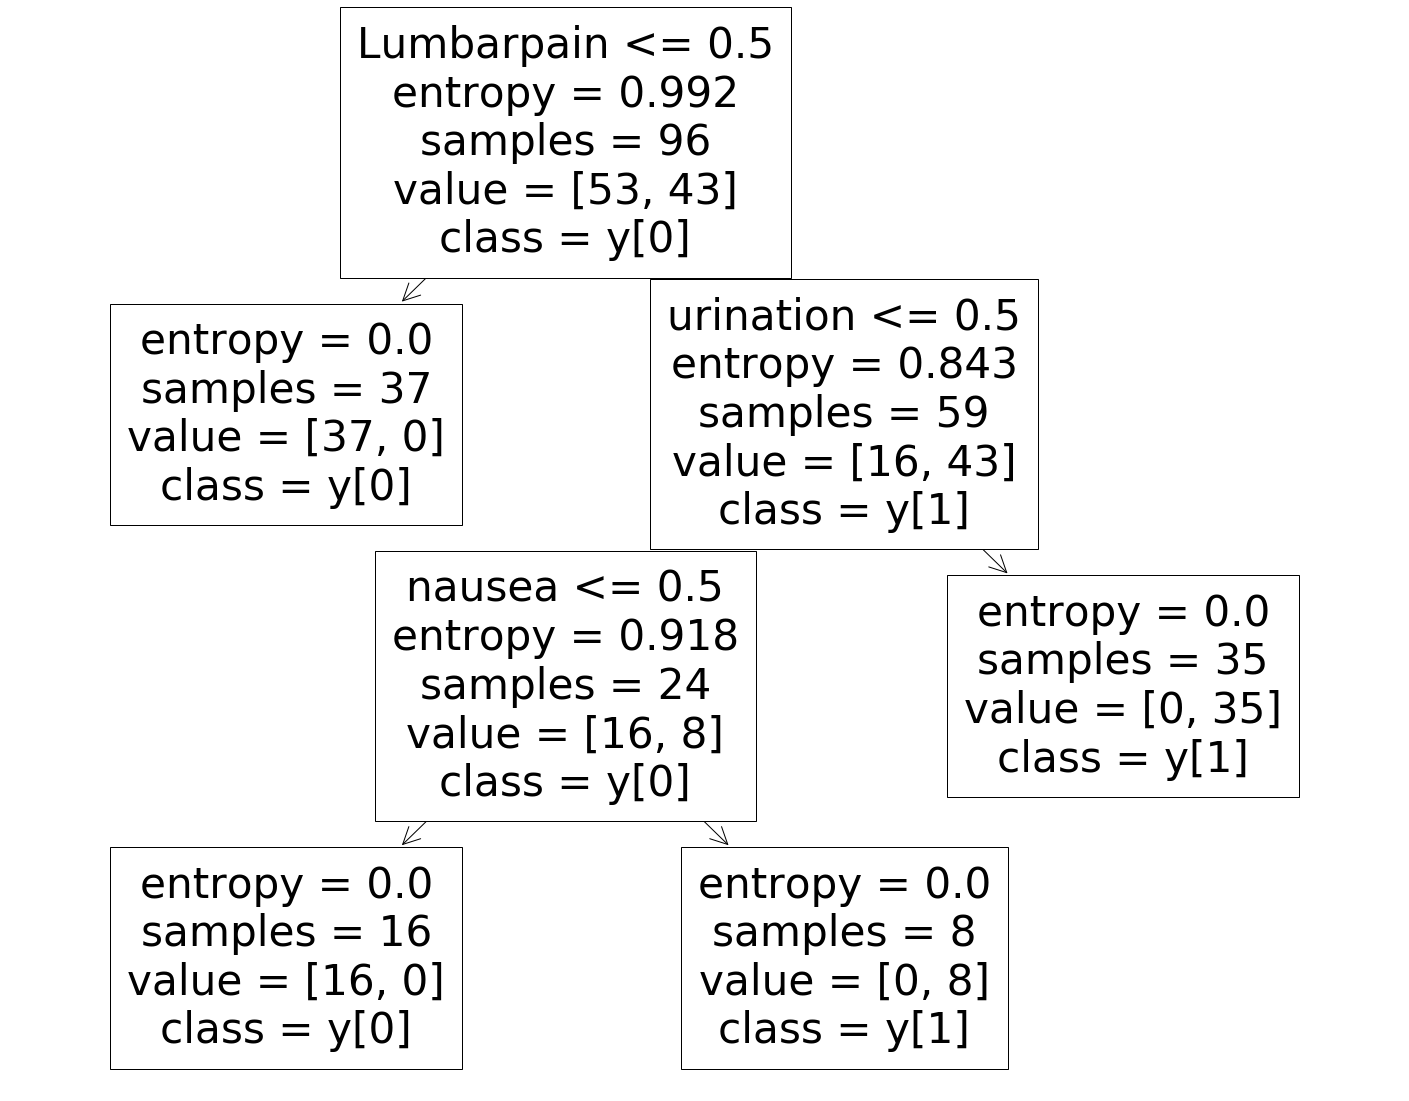

In [253]:
# Create tree
feature_names = ['nausea','Lumbarpain', 'urination', 'Micturitionpains', 'urethrasymptoms', 'Inflammation']
target_names = df1['Nephritis']

plot_tree(model, 
          feature_names = feature_names,
          class_names = True)

plt.show()

# The main symptoms with Nephritis are Lumbar Pain, Frequent Urination, Micturition Pains and a high body Temp. 

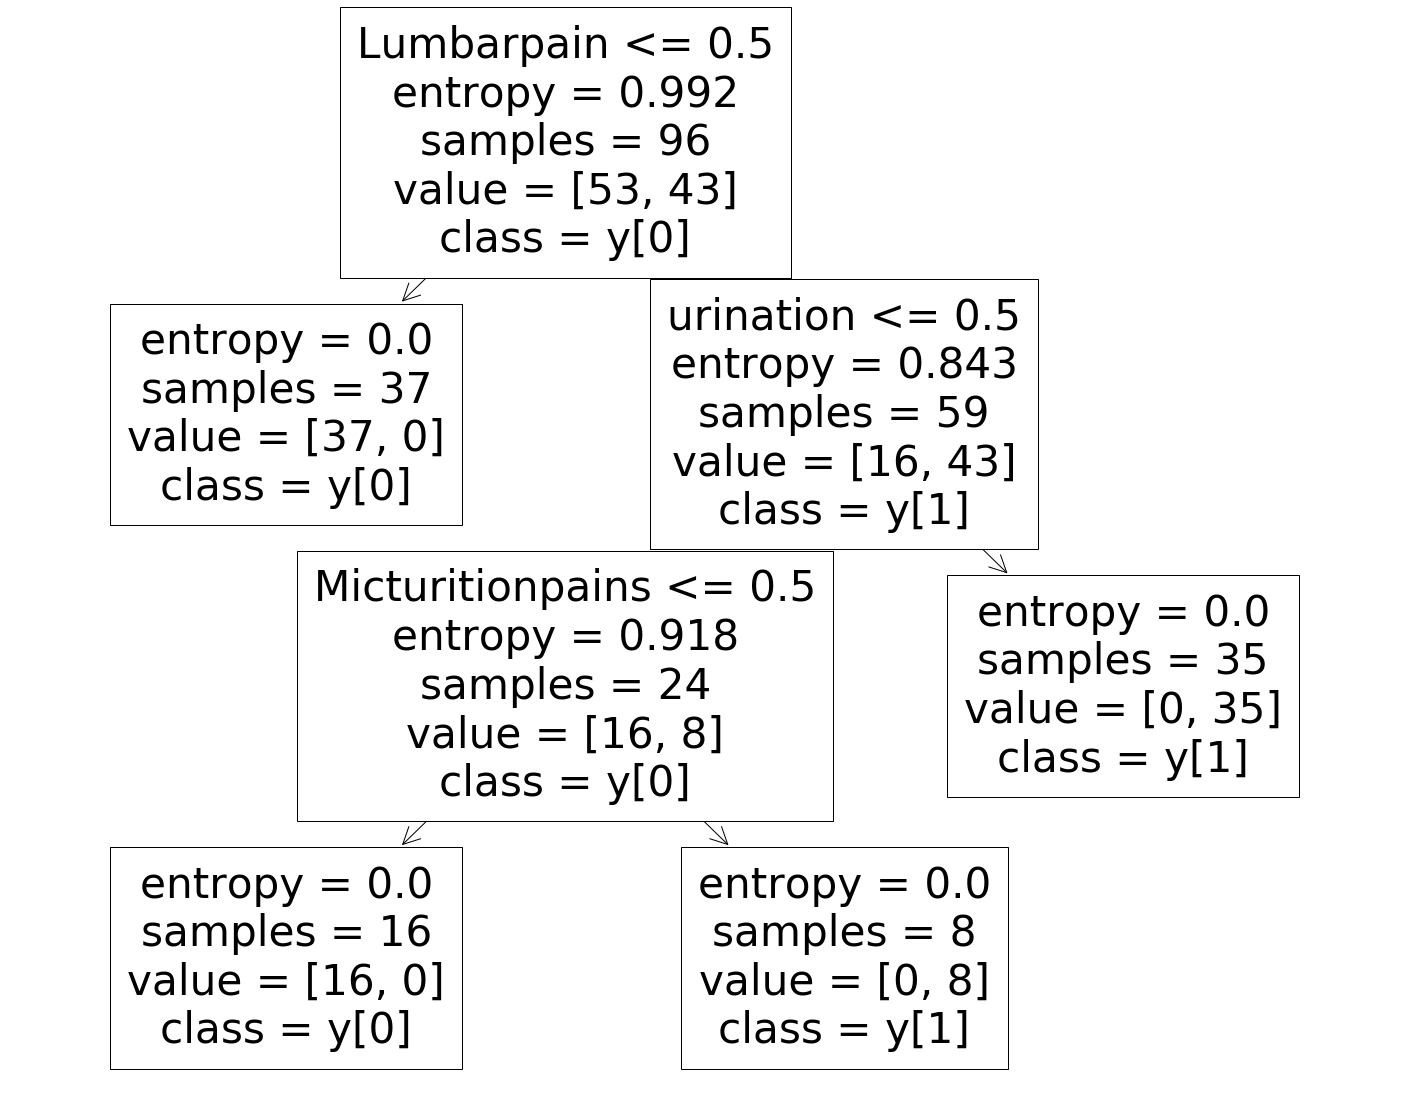

In [250]:
feature_names = ['nausea','Lumbarpain', 'urination', 'Micturitionpains', 'urethrasymptoms', 'Inflammation', 'Nephritis']
target_names = df1['Inflammation']

plot_tree(model, 
          feature_names = feature_names,
          class_names = True)

plt.show()